# Welcome to Your Own Personalized Spotify Wrapped Experience Tutorial

**Authors**  
Isaac Chung, Weston Crewe, and Mehak Garg  

**Brief Summary of the Tutorial**  
Spotify listeners’ music patterns change on a frequent basis, but it’s often difficult to gauge the extent of these changes. The current Spotify Wrapped Experience provides an annual analytical summary with limited information into the user’s music trends. Our tutorial is designed to give users the opportunity to gain insights into their music patterns at various time intervals, rediscover old songs, and explore tracks of interest.  

**Intended Audience**  
Our tutorial is designed for those who crave a deeper understanding of their music habits and possess an intrinsic desire to learn about Python programming, specifically in the fields of data visualization, data analysis, and API utilization. The audience should have taken at least an introduction computer science course in Python, is familiar with Python, Git, and Jupyter environments, and have access to a Spotify account.  

**Libraries and Other Tools Used**  
Spotify API, Spotipy, Git, Matplotlib, Plotly, Seaborn, Pandas, Numpy, Datetime, JSON, Math, Sys, and OS.  

**Vocabulary Used**  
Different Types of APIs, Rate Limits, Client Credentials Flow, API Tokens, API Requests, Built-In Spotipy Commands, Pie Charts, Heat Maps, and Histograms.  

## Table of Contents

Our tutorial will be structured in the following format:

1. We will provide backgorund information on how to get started, including a brief overview about the different types of APIs and the objectives of our tutorial.

2. We will give clear instructions on how to access the Spotify API, including steps on how to create a custom project on the Spotify Developers Page.

3. We will gain practice retrieving and analyzing simple music data from the ENTIRE Spotify Library.

4. We will implement our Customized Spotify Wrapped Experience.

## Section 1: Getting Started

Here is some information for you to know before we dive deeper into the Spotify data analytics.

#### Spotify Wrapped Experience Overview

Let's get things started by understanding what the Spotify Wrapped Experience is all about. It's an annual feature from Spotify (on the Spotify app) that displays your top artists, songs, genres, and various other music metrics of the year, essentially illustrating a snapshot of your music journey.

#### APIs

We will be gathering and utilizing data from the Spotify API, so we should get a general understanding of what a standard API is. An API stands for **Application Programming Interface**. It serves as a bridge between different software applications and allows them to communicate with one another. In other words, APIs are the foundation for how one program can request and exchange data with another, making it a vital tool in software development practices. In our case, we will be using the Spotify API to access and analyze your music data. 

If this sounds challenging or intimidating, don't worry! We will guide you through the process and you will gain exposure to utilizing APIs. Hopefully by the end of this tutorial, you can build confidence to use other APIs for future projects!

#### Public APIs

There are many different types of APIs, which all serve different purposes. The specifiic type of API we would like to focus on is the **Open API**, which are APIs that are open to the public, just like the Spotify API! These APIs are often provided by companies to allow developers to access their services or data. In contrast, there are **Private APIs** that are restricted and *only* used internally by specific organizations and developers. For the purposes of our tutorial, the Spotify API grants us access to Spotify's music data for specific users!

#### RESTful APIs

 The Spotify API, in particular, is a public, **RESTful** API. REST stands for **Representation State Transfer**, which is an architectural method for designing network applications. The Spotify API follows REST principles, providing us access to a plethora of music data and allows us to retrieve information about your favorite songs, artists, and much more!

 #### Web APIs
 
 The Spotify API is also a **Web API**, which is a set of rules and protocols that allow different software applications to communicate over the web. They serve as the connection between your application and a remote server so that data can be exchanged between the two mediums. This allows us to access, retrieve, or send information. In our case, we will be using the Spotify API to fetch and analyze your music data. It is also good to note that this API is employed in various different online services such as social media platforms.

#### Data Privacy

Just a quick note, we understand that your data is private and essential. This tutorial won't access any personal information beyond your Spotify listening history. The data we retrieve will be used for analytical purposes only, so rest assured that your data will be secure!

#### Have fun and explore!

Lastly, remember that this tutorial is not just about learning but also having fun and exploring your own music tastes. Feel free to use what you learn throughout this tutorial to customize and experiment with visualizations, and of course, enjoy the process of discovering your music trends!

## Section 2: Creating a Spotify API Project.

#### Log-In and Dashboard Settings

Before we get started on analyzing our Spotify data, it is important that we create a Spotify project that allows us to interact with the Spotify API. 

We can create a brand new project by heading over to the **Spotify Developers** page given by this url: https://developer.spotify.com.

**NOTE**  
There is no need to understand what the code cell below is performing for the purposes of this tutorial. Our team was unable to display custom images using Markdown commands, so the easiest alternative was to use Python to manually display the images for us.

However, if you would like to explore more about the **IPython** module or how to display images in Python, feel free to dive deeper into the code below!

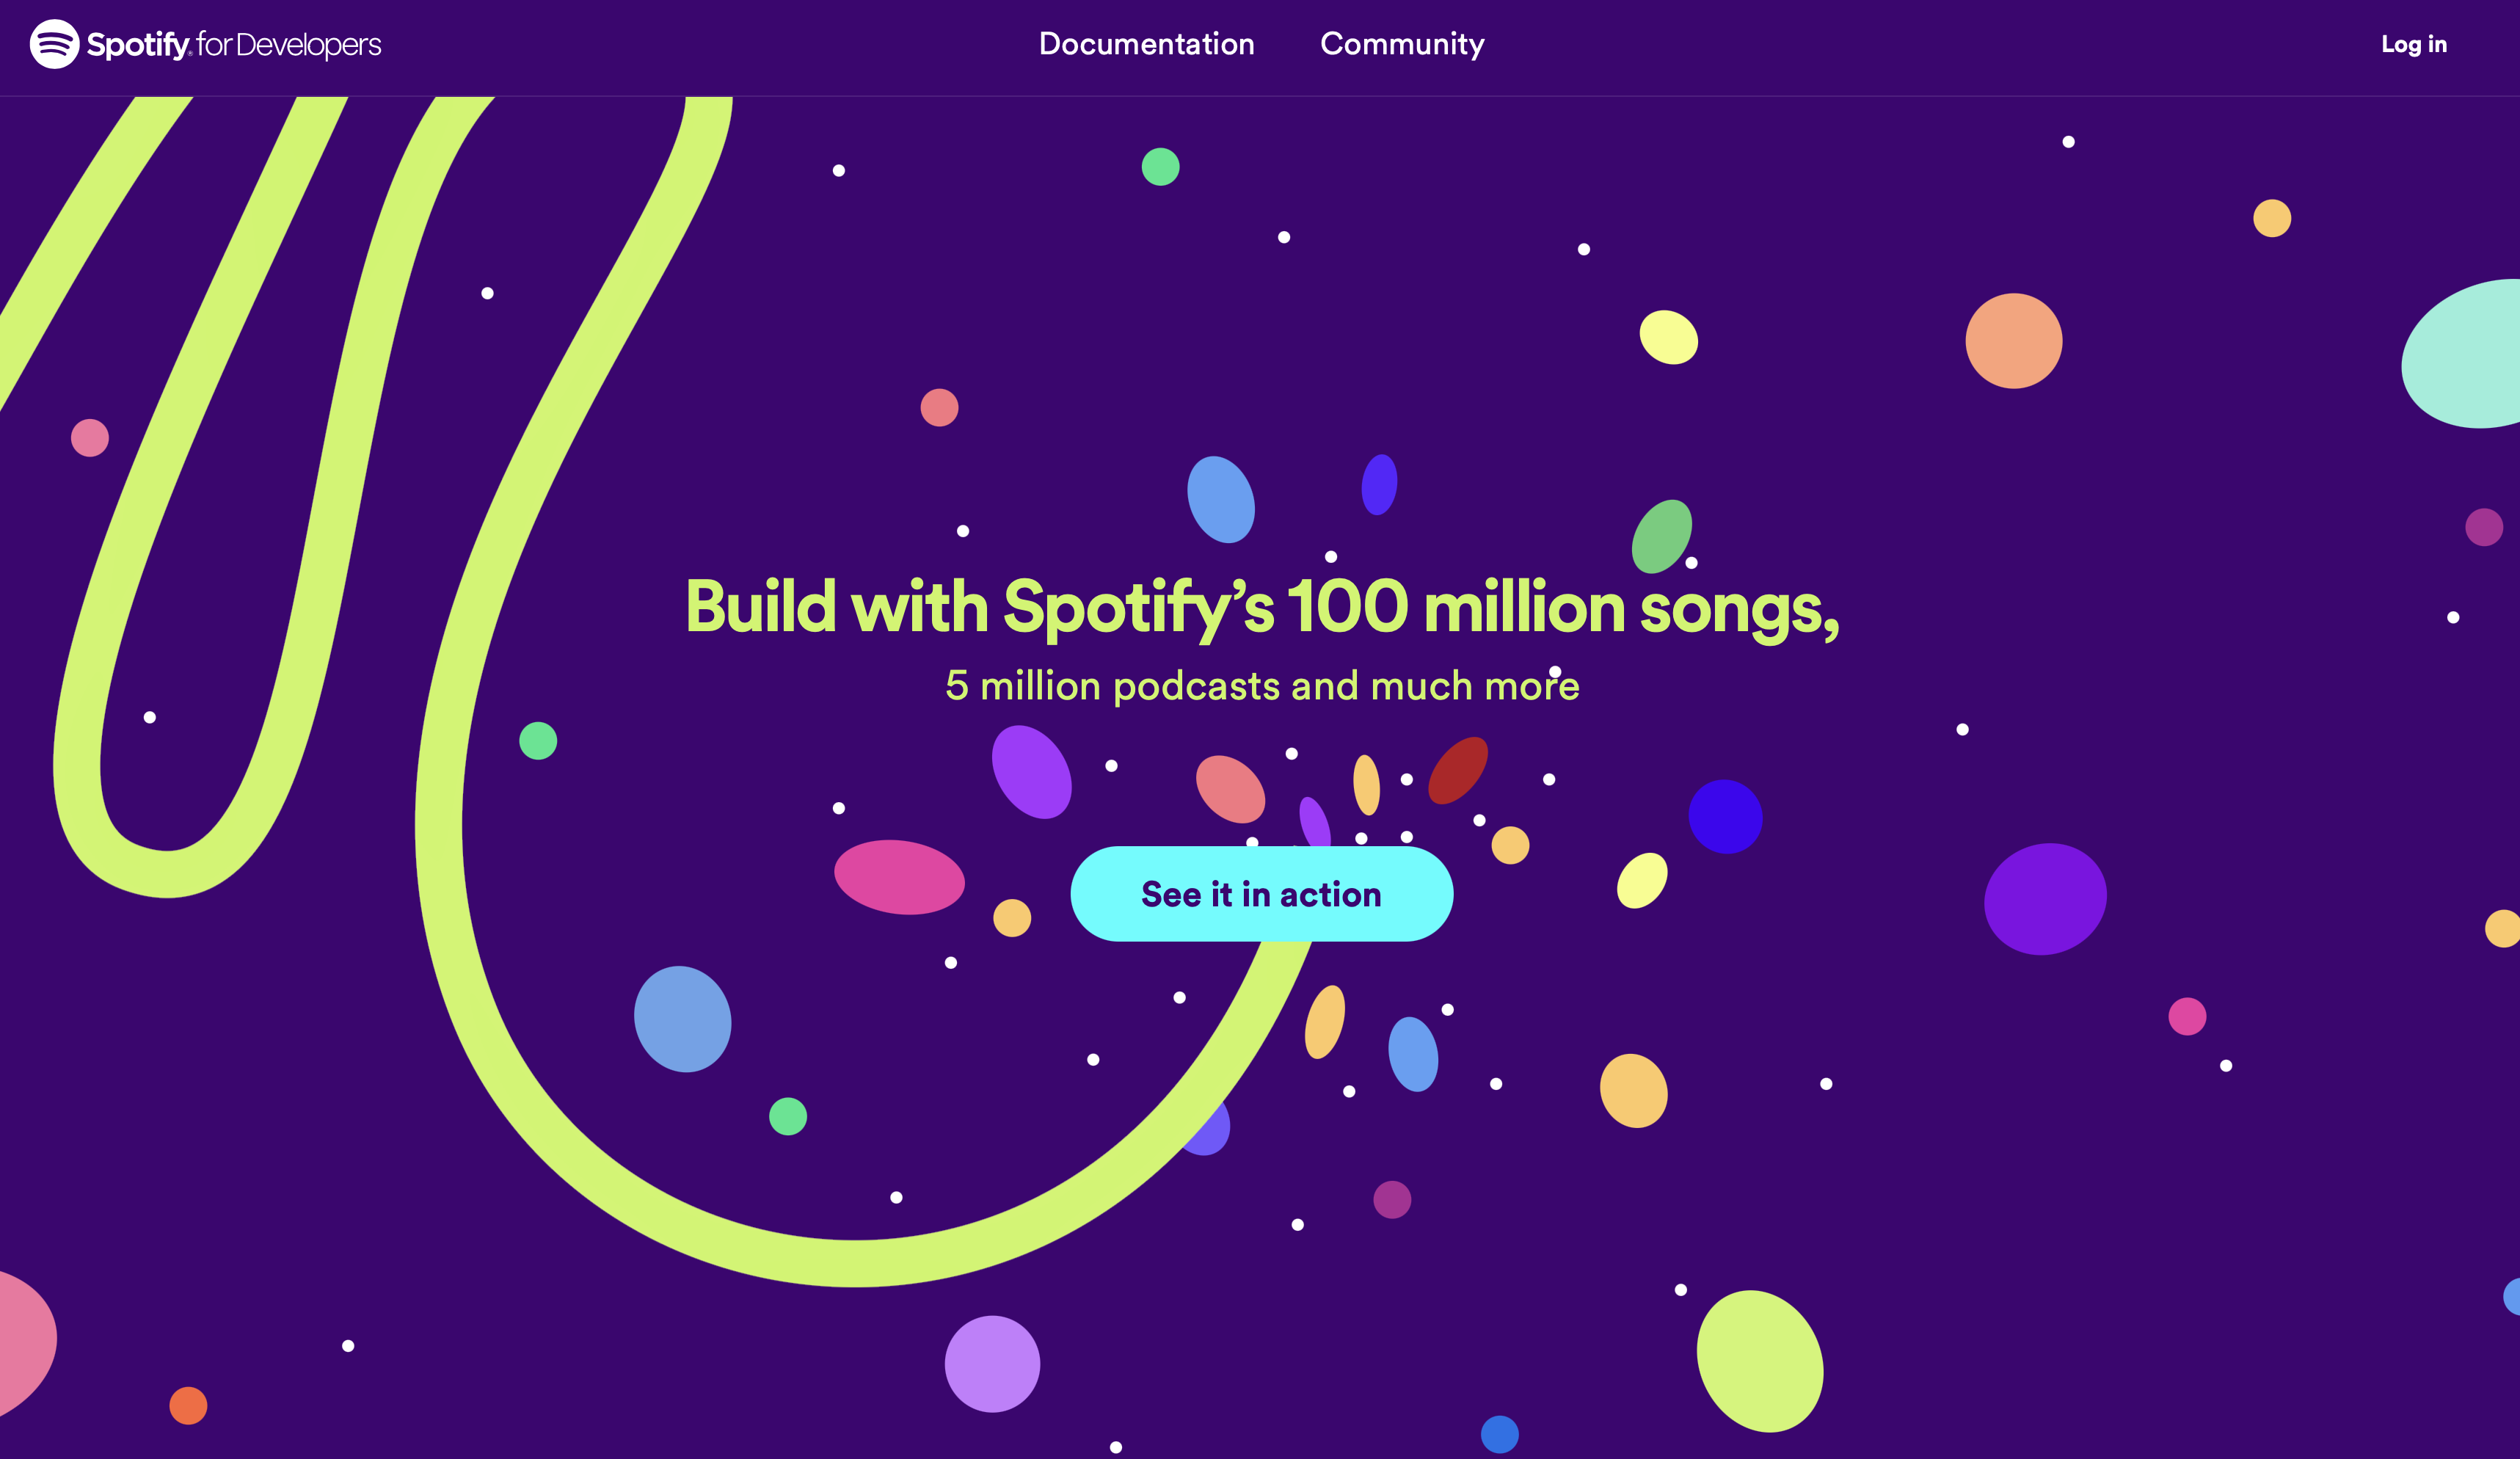

In [1]:
# Ignore this code cell (or not...)
from IPython.display import Image, display

image_path = 'images/developer_page.png'
custom_width = 500
display(Image(filename=image_path, width=custom_width))

We can click `Log In` on the top right of the browser and either create an account or log in using your Spotify account details. 

Afterwards, we can click on `Dashboard` under your profile settings (again, on the top right of the Spotify for Developers page).

#### Creating a Project

Once we are in our dashboard, we can create a new project that we will use for this Spotify Wrapped Experience Tutorial. Click on the button called `Create App` which you can see on your screen.

You can give any Project Name and Description you want, but it is best to leave the Website tab blank in order to avoid any unnecessary errors down the line.

Now, the `Redirect URI` is a very important feature for us to acknowledge. The Redirect URI **(Uniform Resource Identifier)** is a specific web address that is provided by a client application - in this case the Spotify project we are creating - that will direct us to a specific browser link once we are granted or denied permission to access some data from this application. This ensures the correct delivery of user authorization information to the application and prevents security risks.

We can actually choose the browser link for our Redirect URI! For the sake of this tutorial, we strongly recommend using `http://localhost:8888/callback` so that it is easier for you to follow along this tutorial!

At this point, your project should look similar to this:

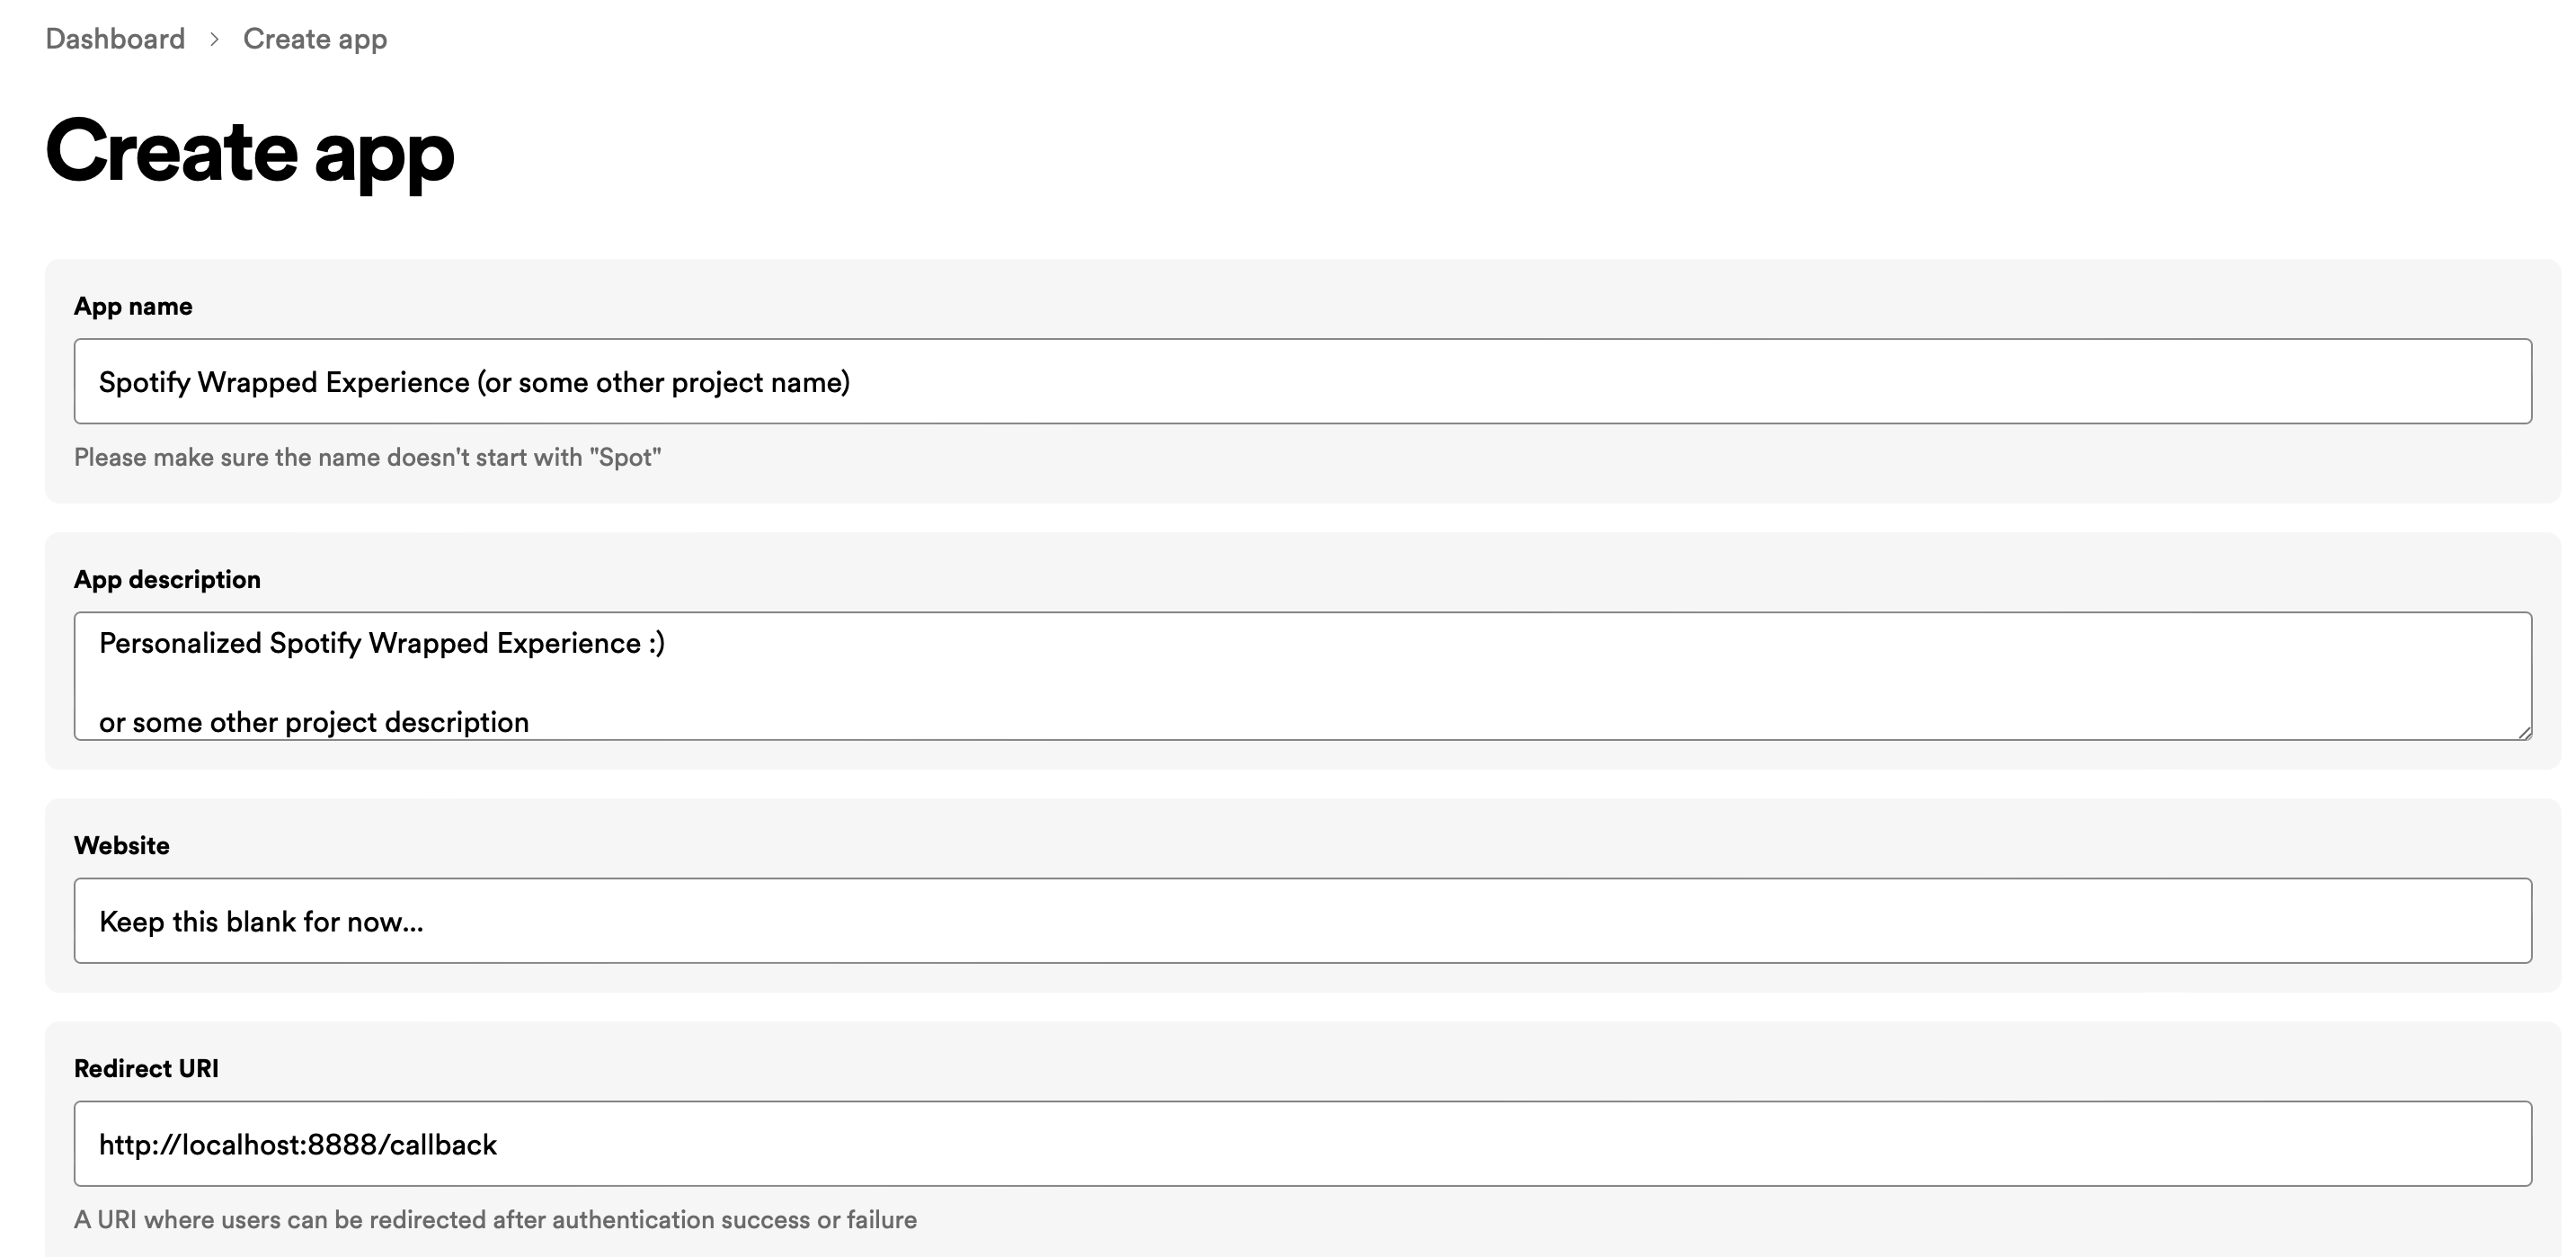

In [2]:
# Ignore this code cell
image_path = 'images/settings_checkup.png'
custom_width = 500
display(Image(filename=image_path, width=custom_width))

Now, agree to the Spotify for Developers' Terms and Services and click `Create Project`.

#### Obtaining User Credentials

Click on the Settings for your project and look for the `Client ID` and `Client Secret` values. You will most likely need to click on `View client secret` to gain access to the Client Secret. These values are the keys to gain access to your Spotify data, but they must be kept somewhere safe to avoid running into errors or security risks.

##### Create a `.env` file in the same directory and store your Client ID and Client Secret values.

Your .gitignore file should already store .env so that the public cannot see this file. If not, **make sure to add this**.

If you would like, copy and paste these lines below and add them to your .env file:

`CLIENT_ID = "your client id"`

`CLIENT_SECRET = "your client secret"`

Make sure to replace the values in the quotation marks with your actual Client ID and Client Secret values.

This was a lot of information, but we are almost ready to code! Before we dive in, we would like to explain the `Client Credentials Flow` to gain a deeper intuition on how we are actually accessing the Spotify API data.

#### Client Credentials Flow

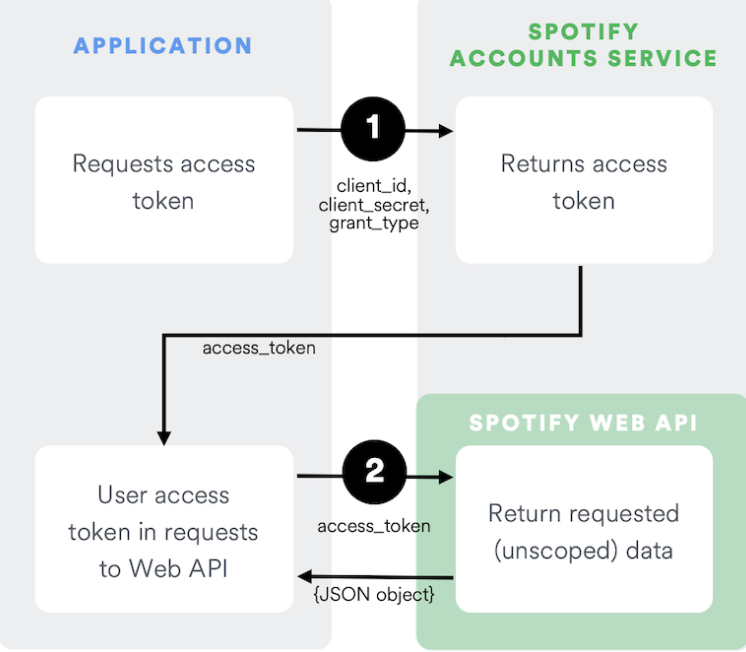

In [3]:
# Ignore this code cell
image_path = 'images/workflow.png'
custom_width = 500
display(Image(filename=image_path, width=custom_width))

##### Let's define this workflow in a series of steps:

1. Every time we want to access Spotify data, whether it's user data or general data, we need to request an access token. 
2. We can retrieve this access token by feeding in some information to the **Spotify Accounts Service** such as the Client ID and Client Secret we derived already. 
3. Once we gain authorization to access our Spotify data, we are given a **user access token** that has an expiry of ~10 minutes to an hour or so. 
4. Using this access token, we can then send **requests** to the Spotify Web API so that we can obtain music data such as artists, tracks, albums, and more!

It is important to note that if your token does expire, we need to obtain a new token by repeating the process above.

#### `Rate Limits`

We cannot continuously send Spotify API requests within a short period of time. This will lead us to run into a **429 error response** from Spotify, indicating that we have reached our API `rate limit`. These rate limits are essential so that the API is reliable and also helps us use the API in a responsible manner. 

Rate limits are determined by the number of calls we make to the Spotify API for every 30 second time frame. It is important for us to not send many requests to the API within every 30 second block or else our ability to fetch music data may be restricted.

#### One more important note:

If at any point, you run into an error stating that `OS Error: [Errno 48] Address already in use`, then this indicates that there is already a process occuring on our port (in our case, 8888) that is defined in our Redirect URI. If you had changeed your redirect uri, then the number can be found here:  

http://localhost:[**NUMBERS HERE**]/callback  

To fix this, we want to kill all processes occurring at that port, and rerun the code cells from the beginning (so that we don't lose or alter music information).

Follow these steps to kill all processes occuring at your port:

1. Run `sudo lsof -i:8888`  (or your specific port number).
2. Find all the PIDs that are listed.
3. Run `kill <PID>` for each PID listed.
4. To kill all processes altogether, run `kill -9 $(lsof -t -i:8888)`.

## Section 3: Practice Retrieving Simple Spotify Music Data

For the purposes of this tutorial, we will be using a relatively new Spotify account to retrieve music data. However, the results should be different once you input your own music credentials.

#### Now, we are ready to fetch some music data! 

We will start off with some simple examples where we want to retrieve Spotify music data that is common across all users (i.e. global music trends).

Let's first make sure that our Client ID and Client Secret are correctly stored in our .env file.

**NOTE**  
If you have trouble importing the necessary modules, make sure to run "!pip install *module name*" in the terminal or a separate code cell to install the modules first before importing them.

In [5]:
from dotenv import load_dotenv          # Python library that allows us to process .env file content
import os                               # Python library that allows us to interact with our operating system

# Load the data from the .env file
load_dotenv()

# Access client id and secret to make sure everything is working
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

print(client_id)
print(client_secret)

Your Client ID should be shown here.
Your Client Secret should be shown here.


We will perform the first and second steps of our Client Credientials Workflow. The function below is designed to retrieve our access token.

**NOTE**  
You can explore the Spotify Developers' webpage to gain familiarity with the different urls we will be using within our functions.

In [6]:
import base64                   # Helps encode binary data to ASCII characters using a Base64 encoding
from requests import post, get  # Requests module that allows us to fetch API data.
import json                     # Provides methods to work with JSON files (simplest data file type).

def get_token(client_id, client_secret):
    '''
        This functions encodes our API token from our Client ID and Client Secret. 
        
        Params: client_id     (a string that represents the client id for our Spotify application).
                client_secret (a string that represents the client secret for our Spotify application).
        Returns: an encoded version of our Spotify API token.
    '''

    # Spotify's own authorization string
    auth_string = client_id + ":" + client_secret

    # Turn the authorization string into bytes
    auth_bytes = auth_string.encode("utf-8")

    # Convert the bytes to a base54 encoding
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")

    # This is the url that we want to send a request to (as given by the Spotify Developers page)
    url = "https://accounts.spotify.com/api/token"

    # Header and Data types can be found in the Spotify Developers page
    headers = {
        "Authorization": "Basic " + auth_base64,
        "Content-Type": "application/x-www-form-urlencoded"
    }
    
    data = {
        "grant_type": "client_credentials"
    }

    result = post(url, headers=headers, data=data)      # Send a post request to fetch data
    json_result = json.loads(result.content)            # Content will be in JSON form as a string
    token = json_result["access_token"]                 # Retrieve only the access token

    return token


# Let's take a look at our token
token = get_token(client_id, client_secret)
print(f"Spotify Access Token: {token}")

Your Spotify Access Token should be shown here.


We can also create a helper function to serve as a basis for creating our header. These headers are necessary to send requests to the Spotify API if we want to retrieve music data. 

Creating this helper function will make it easier for us to send requests to the API without having to redefine the same header every single time.

In [7]:
def get_header(token):
    """
        This helper function creates a header using an access token to send requests to the Spotify API.

        Params: an access token.
        Returns: a header dictionary containing our access token.
    """

    return {"Authorization": "Bearer " + token}

Now, we have everything we need to fetch some music data! 

Let's first retrieve a specific artist from the entire Spotify library.

In [8]:
def search_for_artist(token, artist_name):
    """ 
        This function searches for a specific artist of the user's choosing within the entire Spotify library.

        Params: token       (the access token represented as a string).
                artist_name (the name of the artist of interest represented as a string).
        Returns: the name of the artist as shown in the Spotify library.
    """

    # This is the url we want to send our search request to
    url = 'https://api.spotify.com/v1/search' 

    # Obtain our headers using our newly crafted header function
    headers = get_header(token)

    # Command to query a specific artist in the Spotify library
    query = f"?q={artist_name}&type=artist&limit=1"
    query_url = url + query

    result = get(query_url, headers=headers)                        # Get request (get the information from the API)
    json_result = json.loads(result.content)["artists"]["items"]
    
    # Account for the case where the artist does not exist within Spotify
    if len(json_result) == 0:
        print("No valid artist found.")
        return
    
    # Otherwise, we have found our artist
    return json_result[0]


# Example of searching for a particular artist
result = search_for_artist(token, "Blackpink")
print(result['name'])

BLACKPINK


We can write a similar function to retrieve the top ten tracks from a specific artist!

In [9]:
def get_tracks(token, artist_id):
    """
        This function retrieves the top 10 songs from a particular artist in the Spotify library.

        Params: token     (the access token represented as a string).
                artist_id (the Spotify ID of the artist).
        Returns: None (but prints out the top 10 songs from the artist).
                      (less than 10 if the artist released less than 10 songs).
    """

    # This is the specific url we want to send our search request for tracks
    url = f'https://api.spotify.com/v1/artists/{artist_id}/top-tracks?country=US'
    headers = get_header(token)

    result = get(url, headers=headers)                  # Print out result if JSON structure is unclear
    json_result = json.loads(result.content)["tracks"]

    return json_result


# Example of the artist's top N songs
artist_id = result["id"]                                # Obtain the artist's id using artist data
songs = get_tracks(token, artist_id)

for i, song in enumerate(songs):
    print(f"{i + 1}. {song['name']}")

1. How You Like That
2. Shut Down
3. Pink Venom
4. THE GIRLS - BLACKPINK THE GAME OST
5. Typa Girl
6. As If It's Your Last
7. Lovesick Girls
8. Tally
9. Kill This Love
10. Pretty Savage


## Section 4: Personalized Spotify Wrapped Experience

We have seen how we can retrieve some simple music information from the entire Spotify library. Now, we are ready to analyze our own Spotify data to create our Personalized Spotify Wrapped Experience!

### Part A: Music Data Analysis

#### Let's start off by downloading all the necessary Python modules required to create our Wrapped Experience. 

As a reminder, you can run "!pip install *module name*" if you are running into issues when importing the modules.

In [10]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util
import numpy as np
from datetime import datetime, timedelta
import json
import pandas as pd
from pandas import json_normalize
import math
import os

# This redirect_uri will be used throughout all the functions we wish to implement
# Ensure that this is the same redirect uri as the one you assigned when first creating your Spotify project
# This can be found in the settings of your application (in the Spotify Developers page)
redirect_uri = 'http://localhost:8888/callback'

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### Now, let's create a folder where we can store our Spotify data of interest.

When we retrieve data from the Spotify API, it is automatically in the form of a **JSON** file. It is important to note that this JSON file will be huge as typically, the Spotify API gives us a lot of data about the user's music metrics.  

Luckily for us, JSON data files are the easiest file types for us to manipulate and parse for our analysis. 

We can store all of our JSON data files inside a common folder, so they are kept in one place.

In [11]:
# Create a folder to store all JSON files
folder_path = "json_files"

# If folder doesn't exist, we can create one in the current directory
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder {folder_path} created.")

# If the folder already exists, don't do anything
else:
    print(f"Folder {folder_path} already exists.")

Folder json_files already exists.


#### We can run through some examples of retrieving a user's music information from the Spotify API.

Let's obtain music information about the user's recent top 10 artists!

When running this code cell below (or any code cell throughout this tutorial), you may be prompted to another browser, asking you to give permission for the program to access your Spotify music data. 

If so, press `Authorize`, `Agree`, or other buttons that allow for this authentication process to go through.

This may seem shady at first. However, remember that we are not altering or editing your music data at all. We are simplying reading in the data for our analysis. 

**NOTE**  
The **Spotipy** library doesn't allow us to specify a particular time interval, but rather allows us to choose from three options: `short_term`, `medium_term`, and `long_term`. 

Unfortunately, we have not found a way to work around this technique so instead, we integrated these three options to our analyses.

In [12]:
# Define the scope for data retrieval
# Scope defines the amount of access we are trying to gain from the user's data.
scope = 'user-top-read'     # In this case, we want to only READ in the music info

# Let's create a Spotify object with a specific authentication manager
# Each component of the auth manager is required for us to retrieve the right data
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope=scope))

# Retrieve the top n artist data for the user (here, n == 10)
top_10_artists = sp.current_user_top_artists(10, time_range = 'short_term')

# Store contents in a JSON file
file_path = 'json_files/top_artists.json'

# Dump artist data into a JSON file
with open(file_path, 'w', encoding='utf-8') as json_file:
    json.dump(top_10_artists['items'], json_file, indent = 4, ensure_ascii=False)       # Keep all contents, including non-ASCII characters

print(f"Raw artist data is stored in {file_path}.")

Raw artist data is stored in json_files/top_artists.json.


We can take a look at the newly created JSON file. As you can see, there is a lot of data! Perhaps, it is difficult to analyze them in this way.

Luckily for us, there are more built-in JSON parameters that enable easier viewing. We will utilize some of them here, but you can also go explore the different parameters in your own time. There are a plethora of parameter options online!

**NOTE**  
The Spotify music data is already in sorted order, so there is actually no difference between the newly created file below and the one we made in the cell above.

In [13]:
# We can add more parameters to built-in json commands for easier viewing.
# This example sorts the keys in alphabetical order.
# However, Spotify Data is already in sorted order, so there is no difference shown here.

output = json.dumps(top_10_artists['items'], indent=4, sort_keys=True, ensure_ascii=False)

file_path = 'json_files/sorted_top_artists.json'

with open(file_path, 'w', encoding='utf-8') as json_file:
    json_file.write(output)

print(f"Sorted artist data is stored in {file_path}.")

Sorted artist data is stored in json_files/sorted_top_artists.json.


Now, let's perform more complex analyses. 

#### We can obtain the user's top n artists where we give the user the option to choose n and the time range.

The function may seem confusing at first, and that is totally okay! In your own time, try to go through the function line by line to get a better understanding of what we are trying to do.

It may be helpful to recall that our intent is to retrieve the user's top n artists within a time frame of the user's choosing.

In [14]:
def obtain_top_n_artists(n = 10, time_range = 'short_term'):
    '''
        This function returns the top n artists of the user's listening history.
        The user can select the value for n as well as the time interval.
        Unfortunately, the Spotify API doesn't allow for specific time intervals (i.e. 1 week, 6 months, etc.)
        but we can choose between the predetermined options.

        Params: n          (the number of artists we would like to analyze).
                time_range (long_term, medium_term, short_term).
        Returns: a dataframe containing the user's top n artists within the specified time period.
    '''

    # Same scope as before: only reading the information
    scope = 'user-top-read'

    # Same Spotify object as before
    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                                   client_secret=client_secret,
                                                   redirect_uri=redirect_uri,
                                                   scope=scope))

    top_n_artists = sp.current_user_top_artists(n, time_range = time_range)
    top_n_artists = [artist['name'] for artist in top_n_artists['items']]       # We only want the name of the artist

    # Create a custom dataframe consisting of rank of the artists and their names
    data = {
        "Rank": range(1, n + 1),
        "Artist": top_n_artists,
    }

    # Convert the dataframe into a Pandas dataframe for better aesthetics and viewability
    df = pd.DataFrame(data)
    df = df.set_index('Rank')       # Set the index of the table as the 'Rank' column
    return df

n = 10
time_period = 'short_term'
print(f"User's Top {n} Artists within the {time_period}")

df = obtain_top_n_artists(n, time_period)
df

User's Top 10 Artists within the short_term


,Artist
Rank,
1,Jung Kook
2,aespa
3,IU
4,LE SSERAFIM
5,ITZY
6,NewJeans
7,V
8,WINTER
9,BLACKPINK


Great! We have a dataframe that summarizes the user's top n artists within a given time period. 

Let's try to do the same thing except this time, let's retrieve the user's top n songs within a given time period.

Again, this function may seem intimidating at first, but it will be much easier to understand what is going on if you analyze the code line by line.

Firstly, let's store all of the user's top songs data inside a JSON file.

In [15]:
scope = 'user-top-read'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope=scope))

# Here, we are retrieving the user's top tracks, which is different from retrieving artist data
top_n_songs = sp.current_user_top_tracks(10, time_range = 'short_term')

# Dump all the track data into a JSON file
output = json.dumps(top_n_songs['items'], indent=4, ensure_ascii=False)

file_path = 'json_files/top_songs.json'

# Store contents in a JSON file
with open(file_path, 'w', encoding='utf-8') as json_file:
    json_file.write(output)

print(f"Song data is stored in {file_path}.")

Song data is stored in json_files/top_songs.json.


Just like the artist data, there is a lot of information for the user's top n tracks! Thankfully, we stored the data in a relatively simple way for us to analyze the music information.

Imagine what the data would've looked like if we hadn't stored it in a JSON file with the specified parameters!

#### We can retrieve the user's top n tracks within a specified time range, allowing the user to choose both metrics.

In [16]:
def obtain_top_n_tracks(n = 10, time_range = 'short_term'):
    '''
        This function returns the top n tracks of the user's listening history.
        The user can select the value for n as well as the time interval.
        Unfortunately, the Spotify API doesn't allow for specific time intervals (i.e. 1 week, 6 months, etc.)
        but we can choose between the predetermined options.

        Params: n          (the number of artists we would like to analyze).
                time_range (long_term, medium_term, short_term).
        Returns: a dataframe containing the user's top n songs within the specified time period.
    '''

    scope = 'user-top-read'

    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                                   client_secret=client_secret,
                                                   redirect_uri=redirect_uri,
                                                   scope=scope))

    # Obtain the user's top n tracks
    top_n_tracks = sp.current_user_top_tracks(n, time_range = time_range)
    top_n_tracks = [track['name'] for track in top_n_tracks['items']]       # We only want to keep the names of the tracks
    
    # Same dataframe structure as before
    data = {
        "Rank": range(1, n + 1),
        "Track": top_n_tracks,
    }

    df = pd.DataFrame(data)
    df = df.set_index('Rank')
    return df


n = 10
time_period = 'short_term'
print(f"User's Top {n} Tracks within the {time_period}")

df = obtain_top_n_tracks(n, time_period)
df

User's Top 10 Tracks within the short_term


,Track
Rank,
1,Yes or No
2,Standing Next to You
3,Too Sad to Dance
4,Shot Glass of Tears
5,Hate You
6,Like Heaven
7,Perfect Night
8,You
9,3D (feat. Jack Harlow)


We were able to retrieve the user's top artists and tracks using built-in Spotipy functions. Nice!

We are ready to analyze more trends. Let's try obtaining the user's top n genres within a given time period. This is a feature that is **NOT** present in the current Spotify Wrapped Experience.

**NOTE**  
There are no built-in Spotipy functions that allow us to directly retrieve the user's top genres. We will have to figure out another way to access this data...

#### We can obtain the user's top n genres within a given time range, presenting users the freedom to choose n and the time interval.

In [17]:
def obtain_top_n_genres(n = 10, time_range = 'short_term'):
    '''
        This function returns the top n genres of the user's listening history.
        The user can select the value for n as well as the time interval.
        Unfortunately, the Spotify API doesn't allow for specific time intervals (i.e. 1 week, 6 months, etc.)
        but we can choose between the predetermined options.

        Params: n          (the number of artists we would like to analyze).
                time_range (long_term, medium_term, short_term).
        Returns: a dataframe containing the user's top n genres within the specified time period.
    '''

    scope = 'user-top-read'

    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                                   client_secret=client_secret,
                                                   redirect_uri=redirect_uri,
                                                   scope=scope))

    # Obtain n * 2 artists to ensure that we have enough genres
    # Choosing n artists may not give us n genres due to duplicate genres
    top_n_artists = sp.current_user_top_artists(n * 2, time_range = time_range)

    genre_count = {}        # genre : freq
    genre_sort = []         # [[freq1, genre1], [freq2, genre2], ...]

    for artist in top_n_artists['items']:
        # Obtain the artist's id
        artist_id = artist['id']

        # Obtain artist genre from artist data
        artist = sp.artist(artist_id)
        genre = artist['genres']

        # Find the count of each genre
        for g in genre:
            genre_count[g] = 1 + genre_count.get(g, 0)
        
    for k, v in genre_count.items():
        genre_sort.append((v, k))       # Add the genre and its count to a list
    
    genre_sort.sort(reverse=True)       # Reverse sort based on the count of each genre

    # Keep the names of the top n genres
    top_n_genres = [genre[1] for genre in genre_sort[:n]]
    rank_length = min(n + 1, len(top_n_genres) + 1)             # There may not be enough genres to match n

    data = {
        "Rank": range(1, rank_length),
        "Track": top_n_genres,
    }

    df = pd.DataFrame(data)
    df = df.set_index('Rank')
    return df


n = 10
time_period = 'short_term'
print(f"User's {n} Top Genres within the {time_period}")

df = obtain_top_n_genres(n, time_period)
df

User's 10 Top Genres within the short_term


,Track
Rank,
1,k-pop
2,k-pop girl group
3,pop
4,viral pop
5,korean pop
6,korean ost
7,k-pop boy group
8,j-division
9,canadian pop


We have found the user's top n genres within a given time period. Nice job!

So far, we analyzed the top songs, artists, and genres of the user's music history so far. Following this, it would be interesting to see how many minutes the user has been on Spotify recently.

We can create a function that tells us how many minutes the user has been on Spotify within the last 50 days. 

**NOTE**  
50 days is the limit to which the Spotify API tracks information for each user.

Unfortunately, there is no direct way of accessing the number of minutes the user has been on Spotify. However, we can work our way around this.

Let's suppose that the user's time on Spotify correlates to the duration of songs that the user has recently listened to. Hence, the user's time on Spotify is directly related to how many songs the user has listened to and how long each song was.

Let's kick things off by creating a JSON file that contains all of the user's most recent songs.

In [18]:
# We use a different scope here (read not top data, but recently played data)
scope = 'user-read-recently-played'

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                                client_secret=client_secret,
                                                redirect_uri=redirect_uri,
                                                scope=scope))

# We can get the current time as a datetime object
current_time = datetime.now()

# Starting point
start_time = current_time - timedelta(days = 50)

# Obtain the past 50 songs starting at the start time
recent_songs = sp.current_user_recently_played(after=math.ceil(start_time.timestamp()), limit=50)

# Only store the top 3 so it prevents content flooding
output = json.dumps(recent_songs['items'][:3], indent=4, sort_keys=True, ensure_ascii=False)

file_path = 'json_files/most_recent_songs.json'

# Store contents in a JSON file
with open(file_path, 'w', encoding='utf-8') as json_file:
    json_file.write(output)

print(f"Most recent songs data is stored in {file_path}.")

Most recent songs data is stored in json_files/most_recent_songs.json.


#### We can retrieve the user's time on Spotify in minutes, allowing users to specify the number of days we would like to track.

In [19]:
def time_on_spotify(days = 7):
    '''
        This function displays the amount of time listening to music on Spotify within the past selected number of days.
        However, Spotify gives a maximum limit of the past 50 songs. Hence, if there are more than 50 songs within the given number of days,
        we are only allowed to use the first 50 songs. 

        We can sum the amount of time each song takes up within the past selected number of days (or the past 50 songs) in order to find
        the user's time spent on Spotify. 

        Params:  days (the number of days we wish to find total numnber of minutes for).
        Returns: a dataframe containing the user's minutes on Spotify within the given number of days.
    '''

    scope = 'user-read-recently-played'

    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id = client_id,
                                                   client_secret = client_secret,
                                                   redirect_uri = redirect_uri,
                                                   scope = scope))
    
    # Obtain the current time as a datetime object
    current_time = datetime.now()

    # The starting time we wish to consider
    start_time = current_time - timedelta(days = days)

    # Only obtain the most recent tracks AFTER the starting time
    # If there are less than 50 songs that occur after the start time, 
    # then songs before the start time will also be considered...
    recent_tracks = sp.current_user_recently_played(after=math.ceil(start_time.timestamp()), limit=50)

    # Additional filter method to only keep tracks that occur after the start time
    filtered_tracks  = [track for track in recent_tracks['items'] if track['played_at'] >= start_time.isoformat()]

    # We want to return the number of secs, mins, and hrs
    seconds, minutes, hours = 0, 0, 0

    # No songs played within the past time period
    if len(filtered_tracks) == 0:
        print("No recently played songs within this time period.")
        return
    
    # Return a dataframe consisting of the user's time on Spotify
    else:
        for track in filtered_tracks:
            ms = track['track']['duration_ms']      # Only time feature is duration in ms for each track
            seconds += (ms // 1000)
        
        minutes = seconds // 60
        hours = round(minutes / 60, 2)              # Obtain hours in x.xx format
    
        data = {
                "Hours": hours,
                "Minutes": minutes,
                "Seconds": seconds,
               }
        
        index = ['Time Spent']
        df = pd.DataFrame(data, index=index)
        return df

days = 7
print(f"User's Time Spent on Spotify within the past {days} days")
time_on_spotify(days)

User's Time Spent on Spotify within the past 7 days


,Hours,Minutes,Seconds
Time Spent,2.63,158,9500


Now, we have the user's time spent on Spotify within a specified number of days. Good work!

So far, we have implemented many of the features that already exist in the current Spotify Wrapped Experience. 

For our Personalized Wrapped Experience, we want to analyze uncommon trends and see what new relationships we can find within our music data. 

To do this, let's aim for more complex analyses of the user's music data.

#### Let's compare the user's top n artists within different time periods, allowing the user to choose the value for n.

We can display the artists between the three time frames and show which artists are common between all three time intervals.

In [20]:
def compare_top_n_artists(n = 10):
    '''
        This function compares the top n artists of the user from different time periods.

        Params: n (the number of artists we would like to analyze).
        Returns: a dataframe displaying the artists within each time interval.
                 three lists, each containing strings of artist names for each time interval.
    '''

    # Back to reading the top data
    scope = 'user-top-read'

    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                                   client_secret=client_secret,
                                                   redirect_uri=redirect_uri,
                                                   scope=scope))

    # Obtain user's top artists in short term
    top_n_artists_short_term = sp.current_user_top_artists(n, time_range = 'short_term')['items']
    
    # Obtain user's top artists in medium term
    top_n_artists_medium_term = sp.current_user_top_artists(n, time_range = 'medium_term')['items']

    # Obtain user's top artists in long term
    top_n_artists_long_term = sp.current_user_top_artists(n, time_range = 'long_term')['items']

    artist_short, artist_medium, artist_long = [], [], []
    for i in range(len(top_n_artists_short_term)):                  # Each artist data should be of the same length
        # Only keep the artist names
        artist_short.append(top_n_artists_short_term[i]['name'])
        artist_medium.append(top_n_artists_medium_term[i]['name'])
        artist_long.append(top_n_artists_long_term[i]['name'])


    ######################################################################
    ###### Create Dataframe For Artists in Different Time Intervals ######
    ######################################################################
    
    print(f"User's Top {n} Artists In Three Different Time Intervals.", '\n')

    data = {
        "Rank": range(1, n + 1),
        "Short Term": artist_short,
        "Medium Term": artist_medium,
        "Long Term": artist_long,
    }

    df = pd.DataFrame(data)
    df = df.set_index('Rank')


    ######################################################################
    ##########  Find Common Artists Between All Time Intervals  ##########
    ######################################################################

    common_artists = [set(artist_short) & set(artist_medium) & set(artist_long)]    # Keep artists that appear in all three lists
    print(f"There are {len(common_artists[0])} artist(s) that are common in all three time periods.")

    # Print out all the common artists
    if len(common_artists[0]) > 0:
        print("These artist(s) are: ", end='')
        for i, artist in enumerate(common_artists[0]):
            print(artist, end='.') if i == len(common_artists[0]) - 1 else print(artist, end=', ')

        print()

    return df, artist_short, artist_medium, artist_long


n = 10
df, _, _, _= compare_top_n_artists(n)
df

User's Top 10 Artists In Three Different Time Intervals. 

There are 9 artist(s) that are common in all three time periods.
These artist(s) are: LE SSERAFIM, BLACKPINK, ITZY, BTS, NewJeans, V, IU, aespa, Jung Kook.


,Short Term,Medium Term,Long Term
Rank,,,
1,Jung Kook,Jung Kook,aespa
2,aespa,aespa,IU
3,IU,IU,Jung Kook
4,LE SSERAFIM,NewJeans,BLACKPINK
5,ITZY,V,BTS
6,NewJeans,LE SSERAFIM,NewJeans
7,V,ITZY,LE SSERAFIM
8,WINTER,Korean Jazz Study,V
9,BLACKPINK,BTS,ITZY


Great! Now, we have a way for us to compare the user's top artists across different time intervals. 

What if we want to do the same with the user's top tracks? Intuitively, the method should look very similar. This is on purpose.

The reason why we are showing this function's code in its entirety is so that it can help you further reinforce all the topics we have covered so far about accessing and manipulating Spotify API data.

Now, let's see how we can perform this below!

#### Let's compare the user's top n tracks within different time periods, allowing the user to choose the value for n.

Again, we can determine which tracks are common between the different time periods shown below.

In [21]:
# Compare top songs within different time ranges.
def compare_top_n_songs(n = 10):
    '''
        This function compares the top n tracks of the user from different time periods.

        Params: n (the number of tracks we would like to analyze).
        Returns: a dataframe displaying the tracks within each time interval.
                 three lists, each containing strings of track names for each time interval.
    '''

    scope = 'user-top-read'

    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                                   client_secret=client_secret,
                                                   redirect_uri=redirect_uri,
                                                   scope=scope))

    # Obtain user's top tracks in short term
    top_n_songs_short_term = sp.current_user_top_tracks(n, time_range = 'short_term')['items']
    
    # Obtain user's top tracks in medium term
    top_n_songs_medium_term = sp.current_user_top_tracks(n, time_range = 'medium_term')['items']

    # Obtain user's top tracks in long term
    top_n_songs_long_term = sp.current_user_top_tracks(n, time_range = 'long_term')['items']

    songs_short, songs_medium, songs_long = [], [], []          
    for i in range(len(top_n_songs_short_term)):                    # Each track data should be of the same length
        # Only keep the track names
        songs_short.append(top_n_songs_short_term[i]['name'])
        songs_medium.append(top_n_songs_medium_term[i]['name'])
        songs_long.append(top_n_songs_long_term[i]['name'])


    #####################################################################
    ###### Create Dataframe For Tracks in Different Time Intervals ######
    #####################################################################

    print(f"User's Top {n} Songs In Three Different Time Intervals.", '\n')

    data = {
        "Rank": range(1, n + 1),
        "Short Term": songs_short,
        "Medium Term": songs_medium,
        "Long Term": songs_long,
    }

    df = pd.DataFrame(data)
    df = df.set_index('Rank')


    ######################################################################
    ##########  Find Common Artists Between All Time Intervals  ##########
    ######################################################################

    common_songs = [set(songs_short) & set(songs_medium) & set(songs_long)]     # Keep tracks that appear in all three lists
    print(f"There are {len(common_songs[0])} songs(s) that are common in all three time periods.")

    # Print out all the common tracks
    if len(common_songs[0]) > 0:
        print("These song(s) are: ", end='')
        for i, artist in enumerate(common_songs[0]):
            print(artist, end='.') if i == len(common_songs[0]) - 1 else print(artist, end=', ')
    
    return df, songs_short, songs_medium, songs_long


n = 10
df, _, _, _= compare_top_n_songs(n)
df

User's Top 10 Songs In Three Different Time Intervals. 

There are 1 songs(s) that are common in all three time periods.
These song(s) are: 3D (feat. Jack Harlow).

,Short Term,Medium Term,Long Term
Rank,,,
1,Yes or No,Seven (feat. Latto) (Clean Ver.),Seven (feat. Latto) (Clean Ver.)
2,Standing Next to You,3D (feat. Jack Harlow),VIBE (feat. Jimin of BTS)
3,Too Sad to Dance,ETA,Fighting (Feat. Lee Young Ji)
4,Shot Glass of Tears,Slow Dancing,YEPPI YEPPI
5,Hate You,Yes or No,Ghost
6,Like Heaven,Too Sad to Dance,Queencard
7,Perfect Night,Standing Next to You,"Love, Maybe"
8,You,Queencard,3D (feat. Jack Harlow)
9,3D (feat. Jack Harlow),Hate You,Welcome To MY World (feat. nævis)


Great! Hopefully, you are gaining deeper familiarity with how to manage Spotify API data, how to build concrete Pandas dataframes + tables, and request music data from a user's Spotify music-listening history. 

Nice work on all of your progress so far!

Before heading into graphical visualizations, we want analyze one more complex feature that is not a part of the current Spotify Wrapped Experience. Particularly, let's try to obtain the artists and tracks that the user has recently started listening to the most. An additional component we can add is a time period in which we want to compare to, and we can give users the freedom to choose that time period.

For example, if the user inputs a time period of "long_term", then we want to know what artists and tracks the user has recently listened to compared to the long term. 

**NOTE**  
Logically, this means that for the short term, we would print out all the names of the artists and tracks that the user has recently listened to the most.

#### Let's display the artist names that the user has recently listened to the most compared to a user-specific time frame.

We can provide a dataframe that portrays all artists that the user has listened to the most in all three time periods. 

We can also allow the user to pick a time frame to compare to, and see which distinct artists appear.

In [22]:
def recent_artists(n = 10, time_period = 'medium_term'):
    '''
        This function returns the names of artists that the user has recently started
        listening to the most. We can compare the top artists between the short_term (the
        current time period) with any of the other time periods of the user's choosing.

        Params: n           (the number of artists we would like to analyze).
                time_period (long_term, medium_term, short_term).
        Returns: a dataframe of all the top artists within each time period
                 another dataframe that consists of the artists that appear most recently
    '''

    scope = 'user-top-read'

    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                                   client_secret=client_secret,
                                                   redirect_uri=redirect_uri,
                                                   scope=scope))

    # Obtain user's top artists in short term
    top_n_artists_short_term = sp.current_user_top_artists(n, time_range = 'short_term')['items']
    
    # Obtain user's top artists in medium term
    top_n_artists_medium_term = sp.current_user_top_artists(n, time_range = 'medium_term')['items']

    # Obtain user's top artists in long term
    top_n_artists_long_term = sp.current_user_top_artists(n, time_range = 'long_term')['items']

    artist_short, artist_medium, artist_long = [], [], []
    for i in range(len(top_n_artists_short_term)):                  # Each artist data should be of the same length
        # Only keep the artist names
        artist_short.append(top_n_artists_short_term[i]['name'])
        artist_medium.append(top_n_artists_medium_term[i]['name'])
        artist_long.append(top_n_artists_long_term[i]['name'])
    
    
    ######################################################################
    ###### Create Dataframe For Artists in Different Time Intervals ######
    ######################################################################

    if time_period == 'short_term':
        data = {
            "Rank": range(1, n + 1),
            "Short Term": artist_short,
        }

        # When comparing short term with short term, the unique artists are identical
        data_unique = {
            "Index": range(1, len(artist_short) + 1), 
            "Unique Artists": artist_short
            }
    
    elif time_period == 'medium_term':
        data = {
            "Rank": range(1, n + 1),
            "Short Term": artist_short,
            "Medium Term": artist_medium,
        }

        # Only compare artists within medium and short term
        artist_medium = set(artist_medium)
        unique_artists = [artist for artist in artist_short if artist not in artist_medium]

        data_unique = {
            "Index": range(1, len(unique_artists) + 1), 
            "Unique Artists": unique_artists
            }
    
    else:
        data = {
            "Rank": range(1, n + 1),
            "Short Term": artist_short,
            "Medium Term": artist_medium,
            "Long Term": artist_long,
        }

        # Compare artists within medium AND long term --> should be unique for short_term only
        artist_medium = set(artist_medium)
        artist_long = set(artist_long)
        unique_artists = [artist for artist in artist_short if artist not in artist_medium and artist not in artist_long]

        data_unique = {
            "Index": range(1, len(unique_artists) + 1), 
            "Unique Artists": unique_artists
            }

    df = pd.DataFrame(data)
    df = df.set_index('Rank')
    
    unique_df = pd.DataFrame(data_unique)
    unique_df = unique_df.set_index('Index')

    return df, unique_df


n = 10
time_period = 'long_term'

print(f"User's Top {n} Artists in Three Different Time Intervals")

df, unique_df = recent_artists(n, time_period)
display(df)
print()

print(f"New artists listened to within the {time_period}:")
display(unique_df)

User's Top 10 Artists in Three Different Time Intervals


,Short Term,Medium Term,Long Term
Rank,,,
1,Jung Kook,Jung Kook,aespa
2,aespa,aespa,IU
3,IU,IU,Jung Kook
4,LE SSERAFIM,NewJeans,BLACKPINK
5,ITZY,V,BTS
6,NewJeans,LE SSERAFIM,NewJeans
7,V,ITZY,LE SSERAFIM
8,WINTER,Korean Jazz Study,V
9,BLACKPINK,BTS,ITZY



New artists listened to within the long_term:


,Unique Artists
Index,
1,WINTER


#### Now, let's display the tracks that the user has recently listened to the most, given a user-specific time frame. 

Again, we can provide a dataframe that portrays all the tracks that the user has listened to the most in all three time periods. 

We can allow the user to pick a time frame to compare to, and see which distinct track names appear.

**NOTE**  
This function below will look very similar to the function defined above. 

The reason why we are showing this function's code in its entirety is so that it can help you further reinforce all the topics we have covered so far about accessing and manipulating Spotify API data.

In [23]:
def recent_tracks(n = 10, time_period = 'medium_term'):
    '''
        This function returns the names of tracks that the user has recently started
        listening to the most. We can compare the top tracks between the short_term (the
        current time period) with any of the other time periods of the user's choosing.

        Params: n           (the number of tracks we would like to analyze).
                time_period (long_term, medium_term, short_term).
        Returns: a dataframe of all the top tracks within each time period
                 another dataframe that consists of the tracks that appear most recently
    '''

    scope = 'user-top-read'

    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                                   client_secret=client_secret,
                                                   redirect_uri=redirect_uri,
                                                   scope=scope))

    # Obtain user's top tracks in short term
    top_n_tracks_short_term = sp.current_user_top_tracks(n, time_range = 'short_term')['items']
    
    # Obtain user's top tracks in medium term
    top_n_tracks_medium_term = sp.current_user_top_tracks(n, time_range = 'medium_term')['items']

    # Obtain user's top tracks in long term
    top_n_tracks_long_term = sp.current_user_top_tracks(n, time_range = 'long_term')['items']

    track_short, track_medium, track_long = [], [], []
    for i in range(len(top_n_tracks_short_term)):                   # Each track data should be of the same length
        # Only keep the track names
        track_short.append(top_n_tracks_short_term[i]['name'])
        track_medium.append(top_n_tracks_medium_term[i]['name'])
        track_long.append(top_n_tracks_long_term[i]['name'])

    
    #####################################################################
    ###### Create Dataframe For Tracks in Different Time Intervals ######
    #####################################################################

    if time_period == 'short_term':
        data = {
            "Rank": range(1, n + 1),
            "Short Term": track_short,
        }

        # When comparing short term with short term, the unique tracks are identical
        data_unique = {
            "Index": range(1, len(track_short) + 1), 
            "Unique Tracks": track_short,
            }
    
    elif time_period == 'medium_term':
        data = {
            "Rank": range(1, n + 1),
            "Short Term": track_short,
            "Medium Term": track_medium,
        }

        # Only compare tracks within medium and short term
        track_medium = set(track_medium)
        unique_tracks = [track for track in track_short if track not in track_medium]

        data_unique = {
            "Index": range(1, len(unique_tracks) + 1), 
            "Unique Tracks": unique_tracks
            }
    
    else:
        data = {
            "Rank": range(1, n + 1),
            "Short Term": track_short,
            "Medium Term": track_medium,
            "Long Term": track_long,
        }

        # Compare tracks within medium AND long term --> should be unique for short_term only
        track_medium = set(track_medium)
        track_long = set(track_long)
        unique_artists = [track for track in track_short if track not in track_medium and track not in track_long]

        data_unique = {
            "Index": range(1, len(unique_artists) + 1), 
            "Unique Tracks": unique_artists
            }

    df = pd.DataFrame(data)
    df = df.set_index('Rank')
    
    unique_df = pd.DataFrame(data_unique)
    unique_df = unique_df.set_index('Index')

    return df, unique_df


n = 10
time_period = 'long_term'

print(f"User's Top {n} Tracks in Three Different Time Intervals")

df, unique_df = recent_tracks(n, time_period)
display(df)
print()

print(f"New tracks listened to within the {time_period}:")
display(unique_df)

User's Top 10 Tracks in Three Different Time Intervals


,Short Term,Medium Term,Long Term
Rank,,,
1,Yes or No,Seven (feat. Latto) (Clean Ver.),Seven (feat. Latto) (Clean Ver.)
2,Standing Next to You,3D (feat. Jack Harlow),VIBE (feat. Jimin of BTS)
3,Too Sad to Dance,ETA,Fighting (Feat. Lee Young Ji)
4,Shot Glass of Tears,Slow Dancing,YEPPI YEPPI
5,Hate You,Yes or No,Ghost
6,Like Heaven,Too Sad to Dance,Queencard
7,Perfect Night,Standing Next to You,"Love, Maybe"
8,You,Queencard,3D (feat. Jack Harlow)
9,3D (feat. Jack Harlow),Hate You,Welcome To MY World (feat. nævis)



New tracks listened to within the long_term:


,Unique Tracks
Index,
1,Like Heaven
2,Perfect Night
3,You
4,Good Parts (when the quality is bad but I am)


Great job! Now, we have implemented yet another feature that is not shown in the current Spotify Wrapped Experience. 

By visualizing which songs and tracks the user has listened to the most in recent times, we can get a general idea of the user's music patterns over time!

### Part B: Graphical Data Visualization and Representation

Now that we know what our listening habits look like over different time periods, let's epxlore how we can get some more interactive and aesthetic visualizations using python libraries like Plotly!

As a reminder, you can run "!pip install *module name*" if you are running into issues when importing the modules.

In [24]:
# Import the librariers we need
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#### Pie Chart: Top 50 Genres

We've already created a function to find a user's top genres but we only took a look at the top 10. Using seaborn and matplotlib we can get an idea of just how popular certain genres were across our music history and look at a wider variety of genres!

User's 50 Top Genres within the medium_term


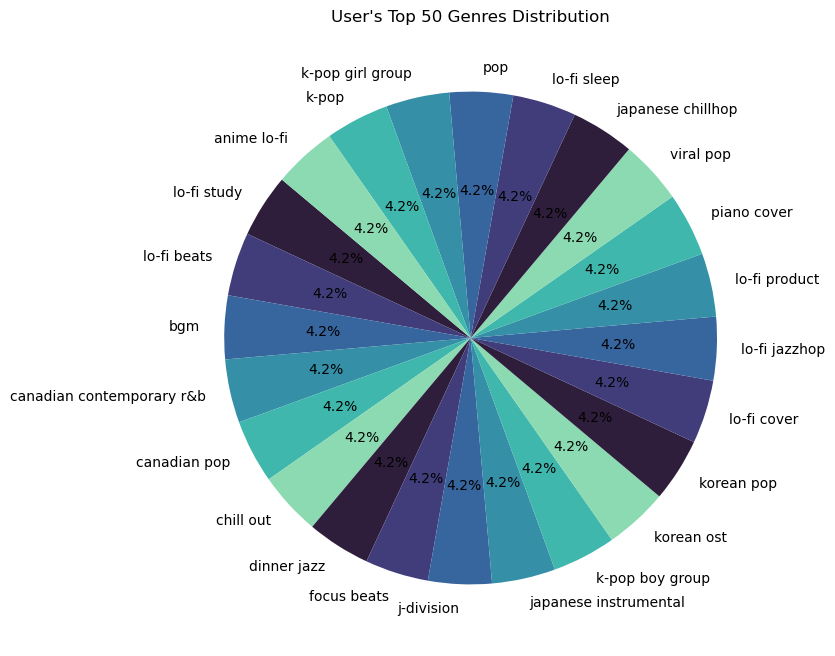

In [25]:
n = 50                                  # Arbitrary value since number of genres may be less than n
time_period = 'medium_term'
print(f"User's {n} Top Genres within the {time_period}")

# Obtain the top n genres of a given time period
genres_df = obtain_top_n_genres(n, time_period)

# Apply a seaborn color palette
palette = sns.color_palette("mako") 

# Plotting a pie chart with seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.set_palette(palette)

# Custom pie parameters; feel free to explore if interested!
plt.pie(genres_df['Track'].value_counts(), labels=genres_df['Track'].value_counts().index, autopct='%1.1f%%', startangle=140)

plt.title(f"User's Top {n} Genres Distribution")
plt.show()

#### Scatter Plot: Artist Popularity

We've already created a function to find a user's top artists but we haven't taken a look at how obscure or popular each artist is. The Spotify API assigns a popularity score to each artist from 1-100. We can access this score for a user's top N artists and plot these scores on a scatter plot, so that we can gauge how niche or mainstream a particular indivudua's music taste is overall.

In [26]:
def obtain_top_n_artists_with_popularity(n=10, time_range='long_term'):
    '''
        This function is VERY similar to the obtain_top_n_artists function defined above. However,
        this function includes a popularity measure for each artist.

        Params: n          (the number of artists we would like to analyze).
                time_range (long_term, medium_term, short_term).
        Returns: a dataframe containing the user's top n artists (according to popularity) within the specified time period.
    '''

    # Same scope as before: only reading the information
    scope = 'user-top-read'

    # Same Spotify object as before
    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                                   client_secret=client_secret,
                                                   redirect_uri=redirect_uri,
                                                   scope=scope))

    # Obtain the top N artist data
    top_n_artists = sp.current_user_top_artists(n, time_range=time_range)

    # Create a custom data structure with artist rank, name, and popularity metric
    top_n_artists_data = [
        {"Rank": i + 1, "Artist": artist['name'], "Popularity": artist['popularity']}
        for i, artist in enumerate(top_n_artists['items'])
    ]

    # Convert the list of dictionaries into a Pandas DataFrame
    artists_df = pd.DataFrame(top_n_artists_data)
    artists_df = artists_df.set_index('Rank')  # Set the index of the table as the 'Rank' column
    return artists_df

Now that we have our function defined, we can plot our results using matplotlib!

**NOTE**
You might get an error of this format: `Mime type rendering requires nbformat>=4.2.0 but it is not installed`.

If so, run this command in the terminal to fix this issue: `pip install nbformat==4.2.0`.

If the error still persists, run `pip install --upgrade jupyterlab` and restart the kernel/runtime of cells from the beginning.

In [27]:
# Now plot the dataframe with popularity scores as a scatterplot
popularity_df = obtain_top_n_artists_with_popularity(50, "long_term")

# Create a scatter plot using Plotly Express
fig = px.scatter(popularity_df, x='Artist', y='Popularity', color='Popularity',     # df, x-var, y-var, color
                 labels={'Popularity': 'Artist Popularity'},                        # x-title: y-title
                 title=f"Top {n} Artists Popularity",                               # title of entire plot
                 height=600)                                                        # height of plot

# Show the plot
fig.show()

#### Heat Map: Valence of Top Songs

We've already created a function to find our top n songs; now, we can use it to access specific features of those songs such as danceability, acousticness, loudness, etc. You can refer to the Spotify API documentation for what other features the get_audio_features() function call has. For this tutorial, we'll be using valence, a measure that denotes how positive a song sounds.

In [28]:
def obtain_top_n_tracks_valence(n=10, time_range='short_term'):
    '''
        This function is VERY similar to the obtain_top_n_tracks function defined above. However,
        this function includes a valence measure for each artist.

        Params: n          (the number of artists we would like to analyze).
                time_range (long_term, medium_term, short_term).
        Returns: a dataframe containing the user's top n tracks (according to valence) within the specified time period.
    '''
    
    # Same scope as before: only reading the information
    scope = 'user-top-read'

    # Same Spotify object as before
    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                                   client_secret=client_secret,
                                                   redirect_uri=redirect_uri,
                                                   scope=scope))

    # Obtain the top N track data
    top_n_tracks = sp.current_user_top_tracks(n, time_range=time_range)
    track_ids = [track['id'] for track in top_n_tracks['items']]

    # Obtain audio features to keep track of valence (for now)
    audio_features = sp.audio_features(track_ids)

    # Create a custom data structure with track rank, name, and valence metric
    track_data = {
        "Rank": range(1, n + 1),
        "Track": [track['name'] for track in top_n_tracks['items']],
        "Valence": [feature['valence'] for feature in audio_features]
    }

    # Convert the list of dictionaries into a Pandas DataFrame
    valence_df = pd.DataFrame(track_data)
    valence_df = valence_df.set_index('Rank')       # Set the index of the table as the 'Rank' column
    return valence_df

Now that we defined our function, we can visualize our data!

User's 10 Top Tracks within the short_term
                                              Track  Valence
Rank                                                        
1                                         Yes or No    0.882
2                              Standing Next to You    0.816
3                                  Too Sad to Dance    0.563
4                               Shot Glass of Tears    0.164
5                                          Hate You    0.250
6                                       Like Heaven    0.515
7                                     Perfect Night    0.502
8                                               You    0.371
9                            3D (feat. Jack Harlow)    0.888
10    Good Parts (when the quality is bad but I am)    0.616


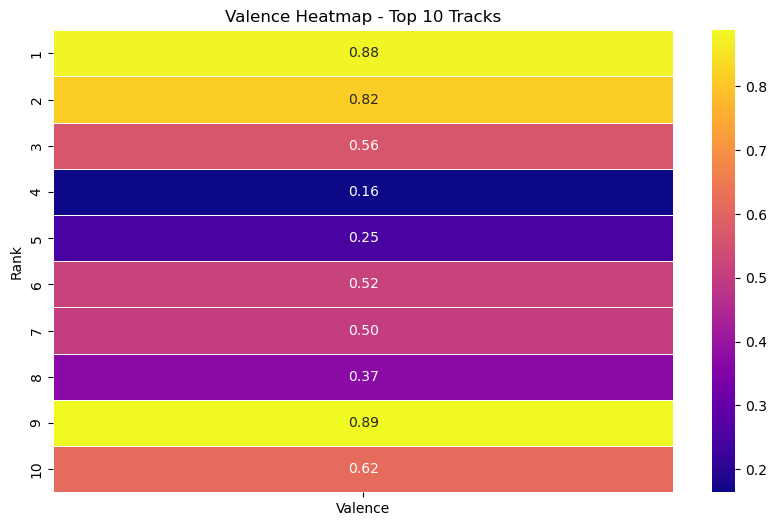

In [33]:
n_tracks = 10                   # Number of tracks
time_period = 'short_term'
print(f"User's {n_tracks} Top Tracks within the {time_period}")

# Obtain our tracks dataframe with the valence metric
track_df = obtain_top_n_tracks_valence(n_tracks, time_period)

# Display the track dataframe
print(track_df)

# Create a heatmap figure using Seaborn
plt.figure(figsize=(10, 6))

# Conditionally set the color of the heatmap 
average_valence = track_df['Valence'].mean()

# Set 0.5 as the threshold to determine emotion of tracks
if average_valence < 0.5: # Sadder tracks 
    cmap = 'blues'
else:                     # Happier tracks
    cmap = 'plasma'

# Plot the heatmap
sns.heatmap(track_df[['Valence']], annot=True, cmap=cmap, fmt='.2f', linewidths=.5)   # Feel free to explore other parameters, if interested!
plt.title(f'Valence Heatmap - Top {n_tracks} Tracks')
plt.show()

Fantastic job! Now, we have implemented some other features not shown in the original Spotify Wrapped experience, and you've gotten exposure to some new Python libraries.

### Part C: Animated Bar Chart

To finish off our tutorial, we would like to display a moving histogram to get another visual representation of the user's music listening patterns over time. In other words, we want to go above and beyond with the ways we visualize the user's listening data. We can do this with an animated bar chart, which displays the user's top songs/artists in the short, medium, and long terms. The visual will have 3 frames, one for each time span, and it will be saved as an mp4 file, 'animated_bar_chart.mp4'.

Let's first download the Python module that will give us access to these animations!

As a reminder, you can run "!pip install *module name*" if you are running into issues when importing the modules.

In [34]:
from matplotlib.animation import FuncAnimation

For this function, the data_type parameter can be either **'songs'** or **'artists'**, and num_items selects how many of the user's top {data_type} to display. If you are interested in exploring methods of visualizing data in animations, you should check out the matplotlib.animation documentation! The link is provided here: https://matplotlib.org/stable/api/animation_api.html

**NOTE**  
In the case that the code cell below doesn't work, please perform the following in your terminal:

For *Windows*: `sudo apt-get install ffmpeg`.  
For *MacOS*: `brew install ffmpeg`, which may require downloading homebrew first. For my Macbook, `pip install ffmpeg` did not work.

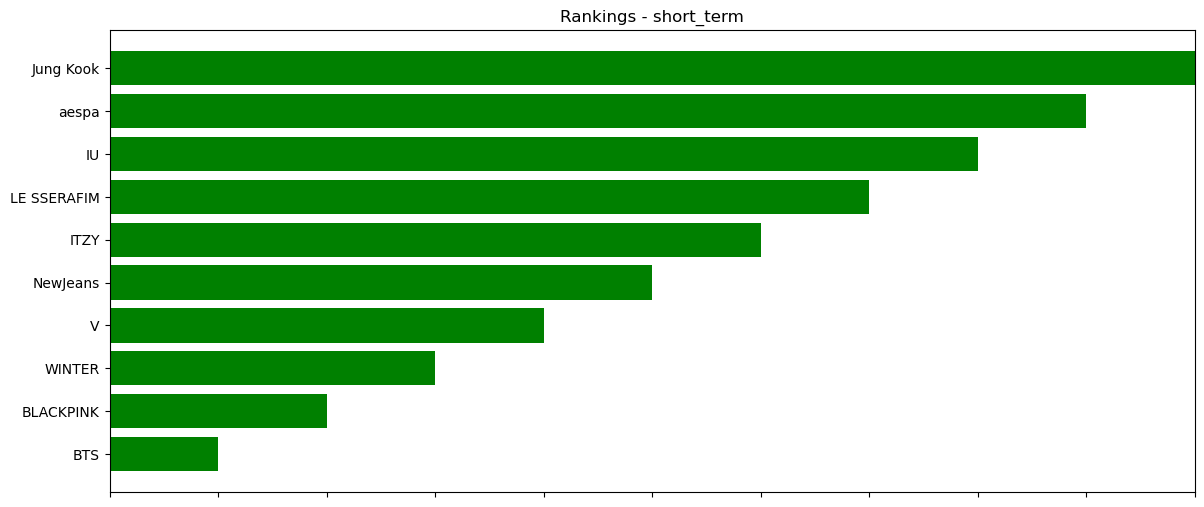

In [41]:
def animated_plot(n = 10, data_type = 'artists'):
    '''
        This function creates a moving histogram (animated bar plot) to help us visualize the user's music listening
        trends over different period of time. This function serves as the last piece of analysis we will
        perform to complete our Personalized Spotify Wrapped Experience!

        Params: n         (the number of artists/tracks we would like to analyze).
                data_type (the particular metric we would like to analyze; we have two choices: 'artists' or 'songs').
        Returns: None, but displays a moving histogram to visualize our music listening patterns over time.
    '''

    # We are analyzing song data over time
    if data_type == 'songs':
        # Obtain data for each time period
        short_term = obtain_top_n_tracks(n = n, time_range = 'short_term')
        medium_term = obtain_top_n_tracks(n = n, time_range = 'medium_term')
        long_term = obtain_top_n_tracks(n = n, time_range = 'long_term')

    # We are analyzing artist data over time
    elif data_type == 'artists':
        # Obtain data for each time period
        short_term = obtain_top_n_artists(n = n, time_range = 'short_term')
        medium_term = obtain_top_n_artists(n = n, time_range = 'medium_term')
        long_term = obtain_top_n_artists(n = n, time_range = 'long_term')

    # Not a valid metric
    else:
        print("Invalid data type selection")
        return   

    # Consolidate data into one dataframe
    data = pd.merge(pd.merge(long_term, medium_term, how = 'outer', on = 'Rank'), short_term, how = 'outer', on = 'Rank')       # Feel free to explore these parameters, if interested!
    
    # Rename the columns for easier accessibility
    new_column_names = ['long_term', 'medium_term', 'short_term']
    data.columns = new_column_names

    # We unfortunately do not have access to data for the number of minutes listened to an artist/song, so we must adjust how we display the top artists/songs
    # We want the top artist to have the highest bar on the histogram, and nth artist to have the lowest
    # Thus, we can invert the rankings and use this as bar height
    # i.e. a Rank of 1 should hold value 10 (if 10 items are displayed), and a Rank of 10 should hold value 1
    data['Value'] = 11-data.index

    # Initialize plots
    fig, ax = plt.subplots(figsize=(14, 6)) ## Adjust this figsize if you are unable to read the artist/song names. If data_type == 'songs', plot width should be much larger
    

    def update(frame):
        '''
            A helper function that updates the frame, changing between long, medium, and short terms.

            Params: frame (the dataframe consisting of data from the metric of interest).
            Returns: None, but updates the moving histogram for each iteration.
        ''' 
        # clear data from previous frame, reset plot elements
        ax.clear()
        ax.set_xlim(0, 10)
        ax.set_xticks(range(11))
        ax.set_xticklabels([])
        ax.invert_yaxis()

        colors = ['blue', 'red', 'green']

        # Columns that hold data shown in different frames 
        time_period = ['long_term', 'medium_term', 'short_term']

        # Specify which column this frame is visualizing, and gather that data
        column = time_period[frame % len(time_period)]
        update_artists = data[column]

        # Initialize bars of the plot
        # Change color of the bars based on which frame is shown
        bars = ax.barh(update_artists, np.zeros(len(update_artists)), color=colors[frame%3])

        # Display the bar and artist data together
        for bar, artist in zip(bars, update_artists):
            bar.set_width(data.loc[data[column] == artist, 'Value'].iloc[0])

        # Make plot title specific to frame, so we can easily identify frame change
        ax.set_title(f"Rankings - {column}")

    # Create animation object with matplotlib's FuncAnimation function
    animation = FuncAnimation(fig, update, frames=3, repeat=True)

    # Save animation as mp4 file
    animation.save(f'animated_plots/top_{data_type}_animated_bar_chart.mp4', writer='ffmpeg', fps=1)

    return


animated_plot(10, 'artists')

Great job! Now, we have an animated histogram of the user's music listening patterns in a separate folder. We can watch these videos to see the immersive visual effects we've created!

## This marks the end of our Personalized Spotify Wrapped Experience Tutorial!

We hope you learned a lot throughout this tutorial, including the lessons ranging from how to manage JSON files, enact requests to the Spotify API, manipulating Spotipy functions to retrieve music data, and gaining deeper familiarity with various common Python modules such as Pandas, Plotly, and Matplotlib. 

We also hope that you had a lot fun walking through this tutorial! Our goal was to provide an interactive, immersive experience where you can analyze your music patterns and trends to your heart's content. 

If you were able to successfully complete this tutorial, you should have a strong foundation in working with the Spotify API. You can use this newfound knowledge to work with other APIs as well as build some really cool projects! API utilization and management is also integral for industrial work and further academia. We hope you can carry on these skills to your future computational work.

##### Congratulations on creating your own Personalized Spotify Wrapped Experience!